In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
np.random.seed(666)
X = np.random.normal(0,1,size = (200,2))
y = np.array(X[:,0]**2 + X[:,1]**2 < 1.5,dtype = int)

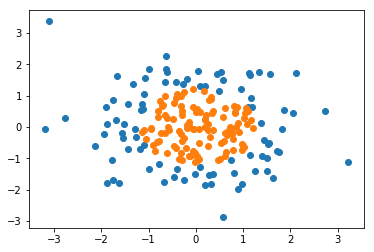

In [8]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [9]:
import numpy as np
from sklearn.metrics import accuracy_score

class LogisticRegression:

    def __init__(self):
        """初始化LogisticRegression模型"""
        self.coef_ = None
        self.intercept_ = None
        self._theta = None

    def _sigmoid(self,t):
        return 1. / (1. + np.exp(-t))


    def fit(self, X_train, y_train, eta=0.01, n_iters=1e4):
        """根据训练数据集X_train, y_train, 使用梯度下降法训练LogisticRegression模型"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"

        def J(theta, X_b, y):
            y_hat = self._sigmoid(X_b.dot(theta))

            try:
                return - np.sum(y * np.log(y_hat) + (1 - y)* np.log(1 - y_hat)) / len(y)
            except:
                return float('inf')

        def dJ(theta, X_b, y):
            # res = np.empty(len(theta))
            # res[0] = np.sum(X_b.dot(theta) - y)
            # for i in range(1, len(theta)):
            #     res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
            # return res * 2 / len(X_b)
            return X_b.T.dot(self._sigmoid(X_b.dot(theta)) - y) /  len(X_b)

        def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

            theta = initial_theta
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break

                cur_iter += 1

            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)

        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self

    def predict_proba(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果概率向量"""
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return self._sigmoid(X_b.dot(self._theta))


    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"

        proba = self.predict_proba(X_predict)
        return np.array(proba >= 0.5,dtype = 'int')

    def score(self, X_test, y_test):
        """根据测试数据集 X_test 和 y_test 确定当前模型的准确度"""

        y_predict = self.predict(X_test)
        return accuracy_score(y_test, y_predict)

    def __repr__(self):
        return "LogisticRegression()"


In [11]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

/Users/xiaruihan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


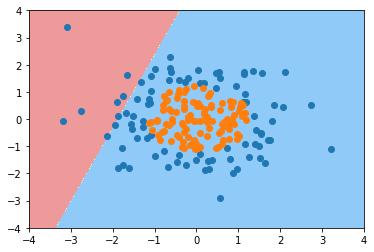

In [15]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def ploynomialLogisticRegression(degree):
    return Pipeline([
            ('ploy',PolynomialFeatures(degree = degree)),
            ('std',StandardScaler()),
            ('log_red',LogisticRegression())
        ])

In [43]:
pipe = ploynomialLogisticRegression(degree = 2)

In [44]:
pipe.fit(X,y)

Pipeline(memory=None,
     steps=[('ploy', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_red', LogisticRegression())])

/Users/xiaruihan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


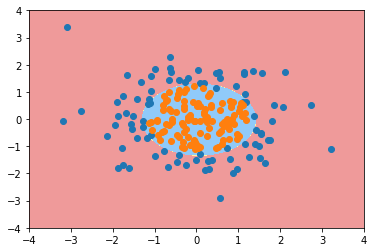

In [46]:
plot_decision_boundary(pipe, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [47]:
pipe.score(X,y)

0.94999999999999996